# Exercise 5.19

In [1]:
import pathlib
import numpy as np
import pandas as pd
from scipy import stats
from chapter_5_utils import *

In [2]:
def load_data() -> pd.DataFrame:
    # Load the lumber data from Table 5.11.
    fpath = pathlib.WindowsPath(r'..\..\data\Table5.11.xlsx')
    return pd.read_excel(fpath, names=['Stiffness', 'Bending'])

In [3]:
lumber_df = load_data()
n, p = lumber_df.shape

## (a)

In [4]:
alpha = 0.05

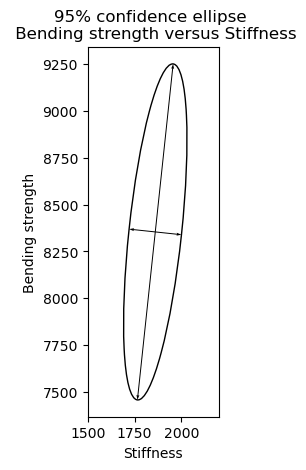

In [5]:
a_plt, a_ax = plot_confidence_ellipse(lumber_df, n, p, alpha)
a_plt.xlabel('Stiffness')
a_plt.ylabel('Bending strength')
a_plt.title('95% confidence ellipse \n Bending strength versus Stiffness')
a_ax.set_aspect('equal')
a_ax.set_xlim(1500, 2200)
a_plt.savefig('Question-5-19-a.png')
a_plt.show()


## (b)

In [6]:
mu0 = np.array([[2000], [10000]])

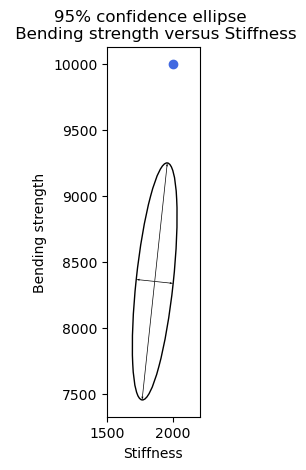

In [7]:
a_plt, a_ax = plot_confidence_ellipse(lumber_df, n, p, alpha)
a_plt.xlabel('Stiffness')
a_plt.ylabel('Bending strength')
a_plt.title('95% confidence ellipse \n Bending strength versus Stiffness')
a_ax.set_aspect('equal')
a_ax.set_xlim(1500, 2200)
a_plt.plot(mu0[0], mu0[1], color='royalblue', marker='o')
a_plt.savefig('Question-5-19-b.png')
a_plt.show()

In [8]:
X = lumber_df.to_numpy() 
xbar = np.mean(X, axis=0).reshape(p,1)
S = np.cov(X, rowvar=False)
n*(xbar - mu0).T @ np.linalg.inv(S) @ (xbar - mu0)
(((n-1)*p)/(n-p))*stats.f.ppf(1-alpha, p, n-p)

6.919370084921073

## (c)

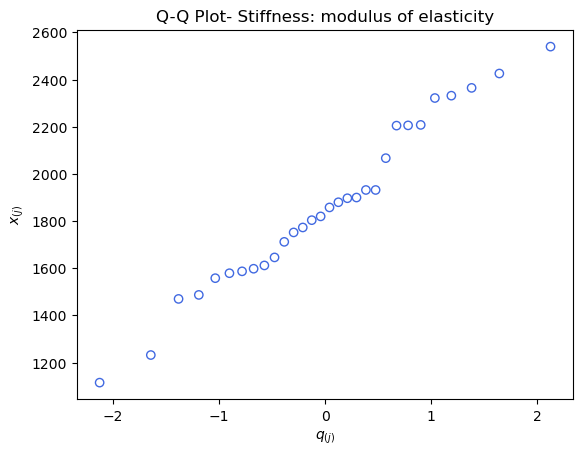

In [9]:
my_q_q_plot(X[:, 0])
ax = plt.gca()
plt.title('Q-Q Plot- Stiffness: modulus of elasticity')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-19-c-QQ-Stiffness.png')
plt.show()

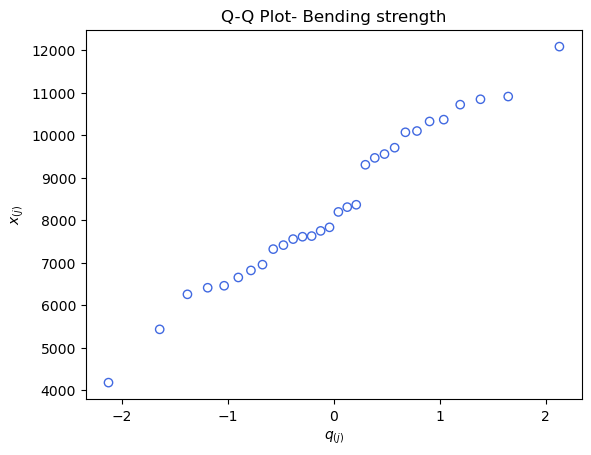

In [10]:
my_q_q_plot(X[:, 1])
ax = plt.gca()
plt.title('Q-Q Plot- Bending strength')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-19-c-QQ-Bending.png')
plt.show()

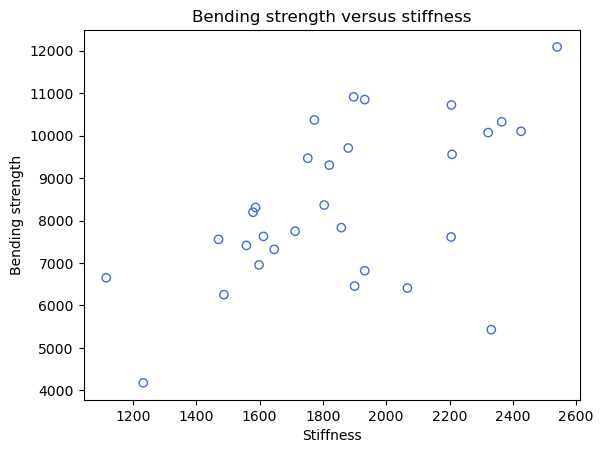

In [11]:
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='royalblue')
plt.xlabel('Stiffness')
plt.ylabel('Bending strength')
plt.title('Bending strength versus stiffness')
plt.savefig('Question-5-19-c-xy.png')
plt.show()

In [12]:
stats.normaltest(lumber_df['Stiffness'])

NormaltestResult(statistic=0.1744160203776826, pvalue=0.9164864372875099)

In [13]:
stats.normaltest(lumber_df['Bending'])

NormaltestResult(statistic=0.3088149361682126, pvalue=0.8569227811803724)

Both tests above are not significant. The data is considered normally distributed.

In [14]:
# Compute the probability plot correlation coefficient test for normality.
values, rq = ppcc_simulation(n=n, num_simulations=100000, q_levels=[0.05])

In [15]:
np.corrcoef(lumber_df['Stiffness'].sort_values(),
            stats.norm.ppf([((i+1) - 0.50)/n for i in range(n)]))[0,1]

0.9888681970771035

In [16]:
np.corrcoef(lumber_df['Bending'].sort_values(),
            stats.norm.ppf([((i+1) - 0.50)/n for i in range(n)]))[0,1]

0.98811132983244

In [17]:
rq.item()

0.9647001581033365

Using the normality test from Chapter 4, the simulated correlation value was 0.9647. The correlation values created for stiffness and bending strength were, 0.9889 and 0.98811, respectively. Both values are larger than the simulated correlation value, so the data is considered univariately normally distributed.

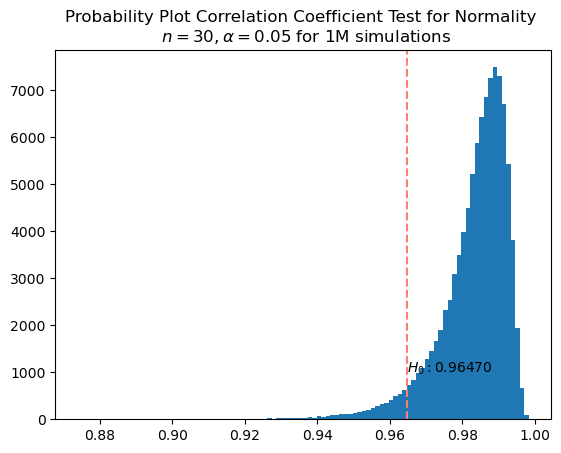

In [18]:
plt.hist(values, bins=100)
plt.title(f'Probability Plot Correlation Coefficient Test for Normality \n $n = {n}, \\alpha = {alpha}$ for 1M simulations')
plt.axvline(x=rq, linestyle='--', color='salmon')
plt.text(rq, 1000, f'$H_{0}: {rq.item():.5f}$')
plt.show()

In [19]:
# Compute the squared distance values to create a chi-squared plot.
d2_data = list()
for i in range(n):
    d2 = ((X[i,:].reshape(p, 1) - xbar).T @ np.linalg.inv(S) @ (X[i,:].reshape(p, 1) - xbar)).item()
    d2_data.append(d2)
d2_data.sort()

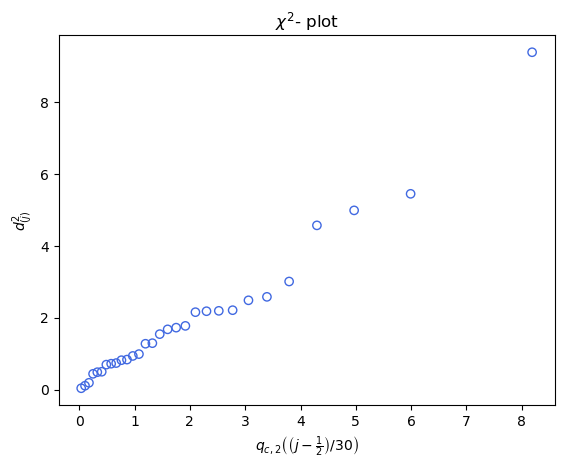

In [20]:
plt.scatter(
    stats.chi2.ppf([((i+1) - 0.50)/n for i in range(n)], df=p),
    d2_data,
    facecolors='none',
    edgecolors='royalblue'
)
plt.xlabel(r'$q_{c,2}\left(\left(j-\frac{1}{2}\right)/30\right)$')
plt.ylabel('$d_{(j)}^{2}$')
plt.title('$\chi^{2}$- plot')
plt.show()